AIDS Virus Infection Prediction

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [25]:
data = pd.read_csv('AIDS_Classification_dataset.csv')
data.shape

(50000, 23)

In [26]:
data.head()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
0,1073,1,37,79.46339,0,1,0,100,0,1,...,1,2,0,1,0,322,469,882,754,1
1,324,0,33,73.02314,0,1,0,90,0,1,...,1,3,1,1,1,168,575,1035,1525,1
2,495,1,43,69.47793,0,1,0,100,0,1,...,1,1,0,0,0,377,333,1147,1088,1
3,1201,3,42,89.15934,0,1,0,100,1,1,...,1,3,0,0,0,238,324,775,1019,1
4,934,0,37,137.46581,0,1,0,100,0,0,...,0,3,0,0,1,500,443,1601,849,0


In [27]:
data.drop_duplicates(inplace=True)
data.shape

(50000, 23)

In [28]:
#Handling Missing Values
num_features = ['age', 'wtkg', 'karnof']
for i in num_features:
    data[i].fillna(value=data[i].median(skipna=True), inplace=True)

cat_features = ['race', 'z30', 'oprior', 'drugs']
for n in cat_features:
    data[n].fillna(value=data[n].mode()[0], inplace=True)

In [29]:
data.isnull().sum()

time        0
trt         0
age         0
wtkg        0
hemo        0
homo        0
drugs       0
karnof      0
oprior      0
z30         0
preanti     0
race        0
gender      0
str2        0
strat       0
symptom     0
treat       0
offtrt      0
cd40        0
cd420       0
cd80        0
cd820       0
infected    0
dtype: int64

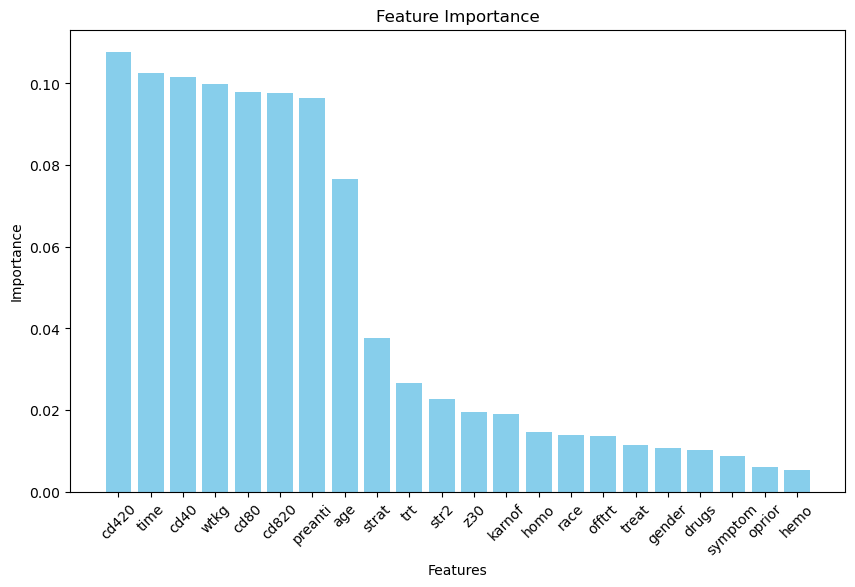

In [30]:
#Visualization on Feature Importance
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
feature_names = X.columns

feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45)
plt.show()

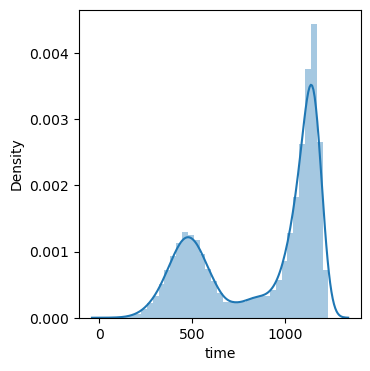

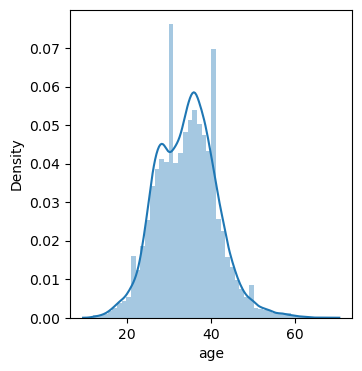

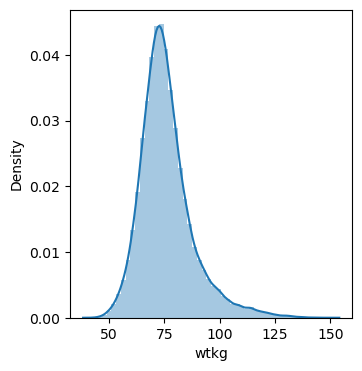

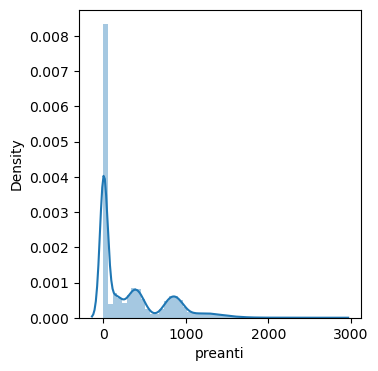

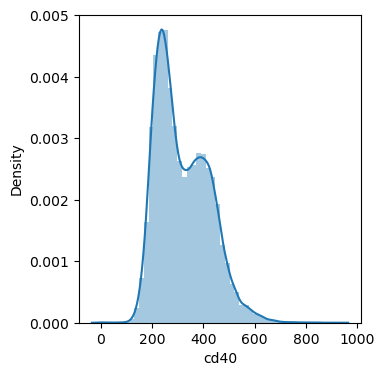

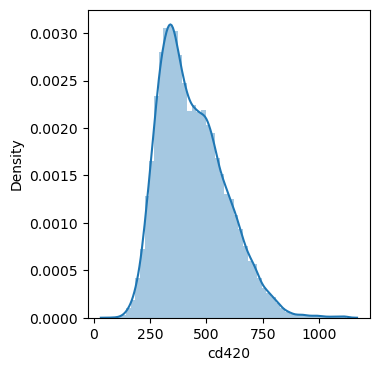

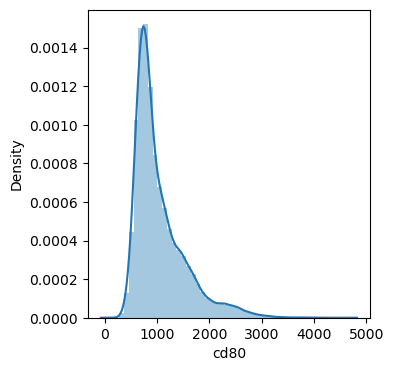

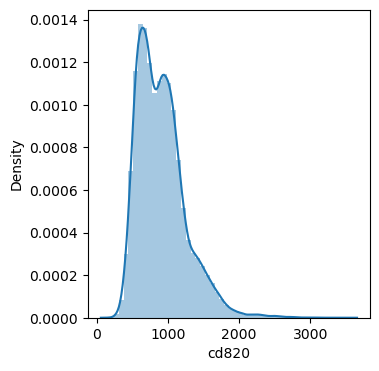

In [31]:
for i in ['time','age','wtkg','preanti','cd40','cd420','cd80','cd820']:
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.distplot(data[i])
    plt.show()

In [32]:
for i in ['time','age','wtkg','preanti','cd40','cd420','cd80','cd820']:
    upper_limit = data[i].mean() + 3 * data[i].std()
    lower_limit = data[i].mean() - 3 * data[i].std()
    data[i] = np.where(data[i] > upper_limit, upper_limit, np.where(data[i] < lower_limit, lower_limit, data[i]))

In [33]:
data.describe()

,time,trt,age,wtkg,hemo,homo,drugs,karnof,oprior,z30,...,str2,strat,symptom,treat,offtrt,cd40,cd420,cd80,cd820,infected
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,877.369780,1.384800,34.148473,75.726376,0.033480,0.653540,0.132220,96.831560,0.042300,0.640880,...,0.575200,1.936420,0.083460,0.734160,0.342220,318.836125,437.557336,1040.063520,902.502762,0.310120
std,307.288688,1.233272,7.037225,11.533999,0.179888,0.475847,0.338733,5.091788,0.201275,0.479747,...,0.494318,0.895318,0.276579,0.441784,0.474458,101.646413,142.908609,466.655823,326.418372,0.462547
min,66.000000,0.000000,12.890563,42.361620,0.000000,0.000000,0.000000,76.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,11.501612,81.000000,96.000000,173.000000,0.000000
25%,542.000000,0.000000,29.000000,68.253682,0.000000,0.000000,0.000000,90.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,236.000000,327.000000,713.000000,649.000000,0.000000
50%,1045.000000,1.000000,34.000000,74.054115,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,299.000000,415.000000,885.000000,858.000000,0.000000
75%,1136.000000,3.000000,39.000000,81.142185,0.000000,1.000000,0.000000,100.000000,0.000000,1.000000,...,1.000000,3.000000,0.000000,1.000000,1.000000,396.000000,531.000000,1245.000000,1084.000000,1.000000
max,1231.000000,3.000000,55.437477,111.948181,1.000000,1.000000,1.000000,100.000000,1.000000,1.000000,...,1.000000,3.000000,1.000000,1.000000,1.000000,626.657468,872.510593,2511.788742,1925.062368,1.000000


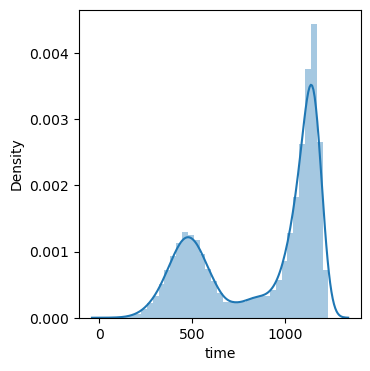

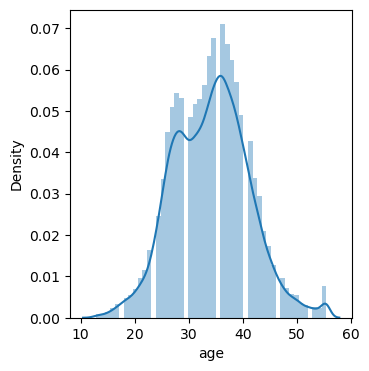

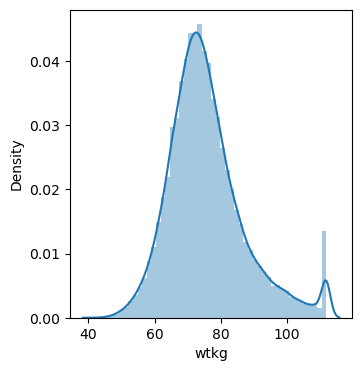

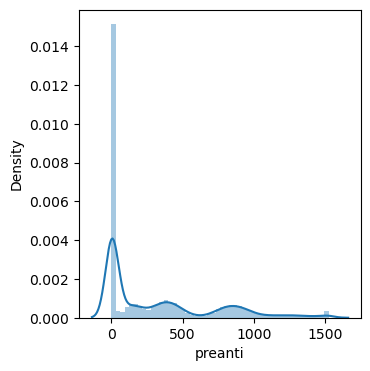

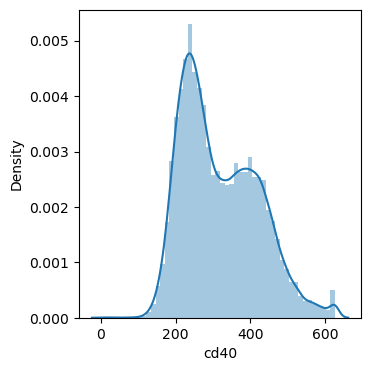

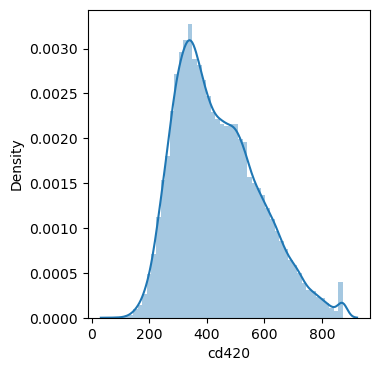

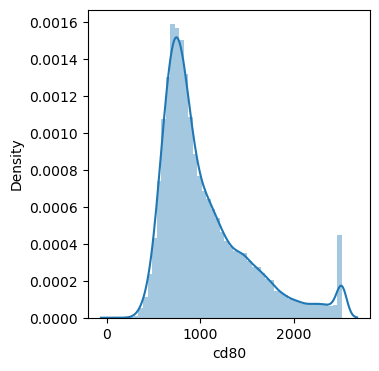

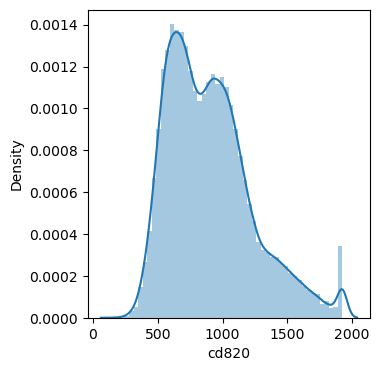

In [34]:
for i in ['time','age','wtkg','preanti','cd40','cd420','cd80','cd820']:
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1)
    sns.distplot(data[i])
    plt.show()

In [35]:
X = data.drop(columns='infected', axis=1)
Y = data['infected']

# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)

[[ 0.63663969 -0.31201868  0.40521017 ...  0.22002158 -0.3387188
  -0.45495064]
 [-1.80083204 -1.12287804 -0.16320137 ...  0.96176179 -0.01085076
   1.90707239]
 [-1.2443465  -0.31201868  1.25782749 ... -0.73164509  0.22915722
   0.56828631]
 ...
 [ 0.91000101 -1.12287804  0.83151883 ...  1.5775461   1.15918813
  -0.12102002]
 [-0.91566206 -1.12287804 -0.44740714 ...  0.01709266 -1.22160529
  -0.11489285]
 [-0.86359324  0.49884068  0.97362172 ... -0.2907995  -0.0815674
  -0.6326385 ]]


In [36]:
#Training Model
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, Y)

X_train, X_test, Y_train, Y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=200, max_depth=15, min_samples_split=5, min_samples_leaf=2, class_weight='balanced', random_state=42)
rf_model.fit(X_train, Y_train)

Y_train_pred_rf = rf_model.predict(X_train)
Y_test_pred_rf = rf_model.predict(X_test)

Random Forest - Training Accuracy: 0.8493930059793441
Random Forest - Test Accuracy: 0.7375706624148427
Random Forest - Training F1 Score: 0.8544257241934919
Random Forest - Test F1 Score: 0.7427353463587922


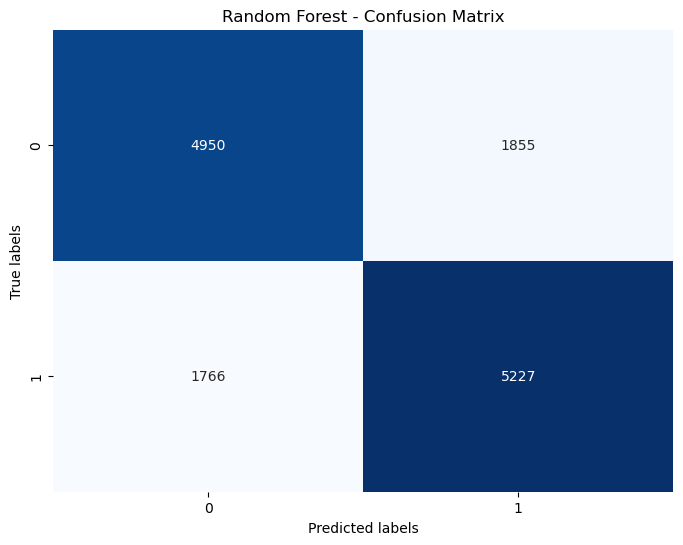

Random Forest - Classification Report
              precision    recall  f1-score   support

           0       0.74      0.73      0.73      6805
           1       0.74      0.75      0.74      6993

    accuracy                           0.74     13798
   macro avg       0.74      0.74      0.74     13798
weighted avg       0.74      0.74      0.74     13798



In [37]:
train_accuracy_rf = accuracy_score(Y_train, Y_train_pred_rf)
test_accuracy_rf = accuracy_score(Y_test, Y_test_pred_rf)
f1_train_rf = f1_score(Y_train, Y_train_pred_rf)
f1_test_rf = f1_score(Y_test, Y_test_pred_rf)

print('Random Forest - Training Accuracy:', train_accuracy_rf)
print('Random Forest - Test Accuracy:', test_accuracy_rf)
print('Random Forest - Training F1 Score:', f1_train_rf)
print('Random Forest - Test F1 Score:', f1_test_rf)

cm_rf = confusion_matrix(Y_test, Y_test_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Random Forest - Confusion Matrix')
plt.show()

print('Random Forest - Classification Report')
print(classification_report(Y_test, Y_test_pred_rf))

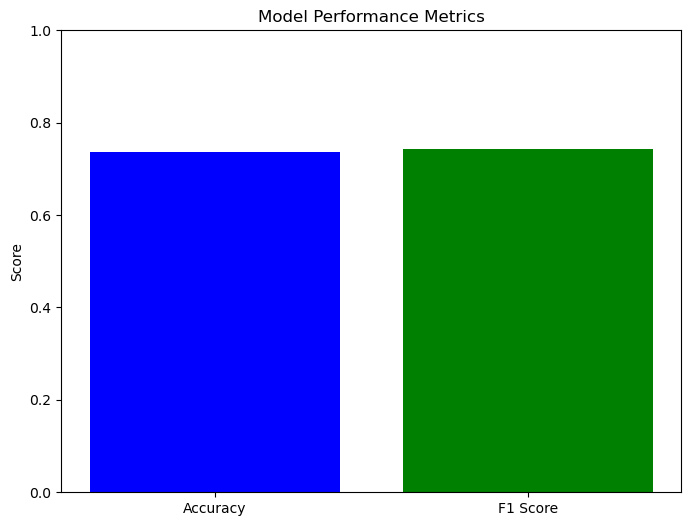

In [38]:
metrics = ['Accuracy', 'F1 Score']
scores = [test_accuracy_rf, f1_test_rf]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green'])
plt.title('Model Performance Metrics')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()